In [1]:
import sys, platform, os
import numpy as np
from scipy.stats import chisquare

camb_path = os.path.realpath(os.path.join(os.getcwd(),'..'))
sys.path.insert(0,camb_path)
import camb
from camb import model, initialpower

import matplotlib.pyplot as plt
import pandas as pd

# Obteniendo los valores de los parámetros

In [2]:
#importando el espectro original para compararlo
df_exp = pd.read_csv('D_ell2.csv')
col_2 = df_exp.D_ell2
rows_exp = df_exp.tail(5049)
row2_exp = rows_exp.D_ell2

#iterando 10 cada parámetro para tener una mejor idea de dónde está el mejor fit
ombh2s = np.linspace(0.005, 0.150, 10)
omch2s = np.linspace(0.005, 0.150, 10)
for ombh2 in ombh2s:
    ombh2 = ombh2  
    for omch2 in omch2s:
        omch2 = omch2
        pars = camb.CAMBparams()
        pars.set_cosmology(H0=67.5, ombh2=ombh2, omch2=omch2, mnu=0.06, omk=0, tau=0.06)
        pars.InitPower.set_params(As=2e-9, ns=0.965, r=0)
        pars.set_for_lmax(5050, lens_potential_accuracy=0);
        #calculando el espectro con los parámetros
        results = camb.get_results(pars)
        powers =results.get_cmb_power_spectra(pars, CMB_unit='muK')
        totCL=powers['total']
        unlensedCL=powers['unlensed_scalar']
        ls = np.arange(totCL.shape[0])
        ell  = np.array(ls)
        D_ell = np.array(unlensedCL[:,0])
        np.savetxt("test" + str(ombh2) + "," + str(omch2) + ".csv",  list(zip(ls,D_ell)), fmt='%.7g', delimiter=',', header='ell,D_ell')
        #leyendo los datos del espectro calculado
        df_obs = pd.read_csv("test" + str(ombh2) + "," + str(omch2) + ".csv")
        col2 = df_obs.D_ell
        rows_obs = df_obs.head(5049)
        row2_obs = rows_obs.D_ell
        #comparando los dos espectros
        chi2 = chisquare(row2_obs, f_exp=row2_exp, ddof=5046)
        #np.savetxt("chi2.csv",  list(zip(ombh2,omch2,chi2)), fmt='%.7g', delimiter=',', header='ombh2,omch2,chi2')
        print(ombh2, omch2, chi2)


0.005 0.005 Power_divergenceResult(statistic=9827422.84895479, pvalue=0.0)
0.005 0.021111111111111112 Power_divergenceResult(statistic=2090957.4853165606, pvalue=0.0)
0.005 0.03722222222222222 Power_divergenceResult(statistic=997312.5421701157, pvalue=0.0)
0.005 0.05333333333333333 Power_divergenceResult(statistic=856376.4518395732, pvalue=0.0)
0.005 0.06944444444444445 Power_divergenceResult(statistic=944327.735014724, pvalue=0.0)
0.005 0.08555555555555555 Power_divergenceResult(statistic=1067082.695135667, pvalue=0.0)
0.005 0.10166666666666667 Power_divergenceResult(statistic=1182128.6754842056, pvalue=0.0)
0.005 0.11777777777777779 Power_divergenceResult(statistic=1284217.6251510738, pvalue=0.0)
0.005 0.1338888888888889 Power_divergenceResult(statistic=1374754.1632178004, pvalue=0.0)
0.005 0.15 Power_divergenceResult(statistic=1456122.8532147636, pvalue=0.0)
0.021111111111111112 0.005 Power_divergenceResult(statistic=6219265.373775274, pvalue=0.0)
0.021111111111111112 0.021111111111

In [4]:
#iterando ahora 50 veces sobre un valor más acotado de los parámetros
ombh2s = np.linspace(0.05, 0.075, 50)
omch2s = np.linspace(0.09, 0.110, 50)
for ombh2 in ombh2s:
    ombh2 = ombh2
    for omch2 in omch2s:
        omch2 = omch2
        pars = camb.CAMBparams()
        pars.set_cosmology(H0=67.5, ombh2=ombh2, omch2=omch2, mnu=0.06, omk=0, tau=0.06)
        pars.InitPower.set_params(As=2e-9, ns=0.965, r=0)
        pars.set_for_lmax(5050, lens_potential_accuracy=0);
        #calculando el espectro
        results = camb.get_results(pars)
        powers =results.get_cmb_power_spectra(pars, CMB_unit='muK')
        totCL=powers['total']
        unlensedCL=powers['unlensed_scalar']
        ls = np.arange(totCL.shape[0])
        ell  = np.array(ls)
        D_ell = np.array(unlensedCL[:,0])
        #guardando y leyendo los datos de los espectros
        np.savetxt("test" + str(ombh2) + "," + str(omch2) + ".csv",  list(zip(ls,D_ell)), fmt='%.7g', delimiter=',', header='ell,D_ell')
        df_obs = pd.read_csv("test" + str(ombh2) + "," + str(omch2) + ".csv")
        col2 = df_obs.D_ell
        rows_obs = df_obs.head(5049)
        row2_obs = rows_obs.D_ell
        #comparando los datos de los espectros
        chi2 = chisquare(row2_obs, f_exp=row2_exp, ddof=5046)
        #np.savetxt("chi2.csv",  list(zip(ombh2,chi2)), fmt='%.7g', delimiter=',', header='ombh2,chi2')
        print(ombh2, omch2, chi2)


0.05 0.09 Power_divergenceResult(statistic=35697.95794603898, pvalue=0.0)
0.05 0.09040816326530612 Power_divergenceResult(statistic=36095.41533016106, pvalue=0.0)
0.05 0.09081632653061224 Power_divergenceResult(statistic=36522.09029050125, pvalue=0.0)
0.05 0.09122448979591836 Power_divergenceResult(statistic=36984.13953155691, pvalue=0.0)
0.05 0.09163265306122449 Power_divergenceResult(statistic=37481.805334899815, pvalue=0.0)
0.05 0.0920408163265306 Power_divergenceResult(statistic=38017.23555465996, pvalue=0.0)
0.05 0.09244897959183673 Power_divergenceResult(statistic=38586.219059053845, pvalue=0.0)
0.05 0.09285714285714286 Power_divergenceResult(statistic=39191.05311713657, pvalue=0.0)
0.05 0.09326530612244897 Power_divergenceResult(statistic=39828.76831304063, pvalue=0.0)
0.05 0.0936734693877551 Power_divergenceResult(statistic=40500.36280790288, pvalue=0.0)
0.05 0.09408163265306121 Power_divergenceResult(statistic=41203.48451688731, pvalue=0.0)
0.05 0.09448979591836734 Power_diver

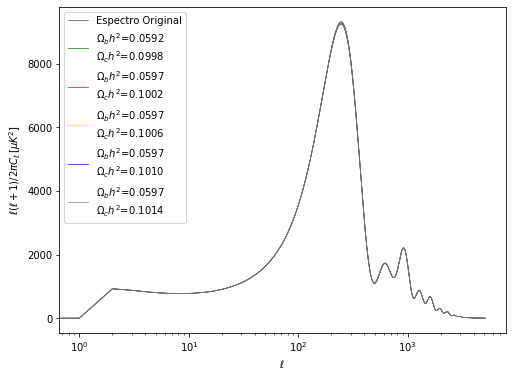

In [3]:
#gráfico comparando los espectros

data = np.genfromtxt("D_ell.csv", delimiter=",", names=["x", "y"])#espectro original
data1 = np.genfromtxt("test0.05918367346938776,0.09979591836734694.csv", delimiter=",", names=["x", "y"])
data2 = np.genfromtxt("test0.05969387755102041,0.10020408163265306.csv", delimiter=",", names=["x", "y"])
data3 = np.genfromtxt("test0.05969387755102041,0.10061224489795918.csv", delimiter=",", names=["x", "y"])
data4 = np.genfromtxt("test0.05969387755102041,0.10102040816326531.csv", delimiter=",", names=["x", "y"])
data5 = np.genfromtxt("test0.05969387755102041,0.10142857142857142.csv", delimiter=",", names=["x", "y"])


plt.figure(figsize=(8,6))
plt.xscale('log')
plt.xlabel('$\ell$')
plt.ylabel('$\ell(\ell+1)/2\pi C_\ell\,[\mu K^2]$')

plt.semilogx(data['x'], data['y'],color="black", label="Espectro Original", linewidth=0.5)
plt.semilogx(data1['x'], data2['y'],color="green", label="$\\Omega_b h^2$=0.0592\n$\\Omega_c h^2$=0.0998", linewidth=0.7)
plt.semilogx(data2['x'], data1['y'],color="red", label="$\\Omega_b h^2$=0.0597\n$\\Omega_c h^2$=0.1002", linewidth=0.7)
plt.semilogx(data3['x'], data1['y'],color="yellow", label="$\\Omega_b h^2$=0.0597\n$\\Omega_c h^2$=0.1006", linewidth=0.7)
plt.semilogx(data4['x'], data1['y'],color="blue", label="$\\Omega_b h^2$=0.0597\n$\\Omega_c h^2$=0.1010", linewidth=0.7)
plt.semilogx(data5['x'], data1['y'],color="grey", label="$\\Omega_b h^2$=0.0597\n$\\Omega_c h^2$=0.1014", linewidth=0.7)

plt.xlabel('$\ell$')
plt.ylabel('$\ell(\ell+1)/2\pi C_\ell\,[\mu K^2]$')
plt.legend(loc="upper left")
plt.savefig('comparacion.png', dpi=150)
plt.show()



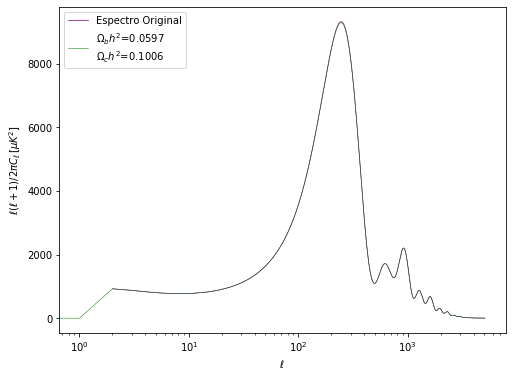

In [7]:
#graficando el mejor fit junto al espectro original

data = np.genfromtxt("D_ell.csv", delimiter=",", names=["x", "y"])
data1 = np.genfromtxt("test0.05969387755102041,0.10061224489795918.csv", delimiter=",", names=["x", "y"])


plt.figure(figsize=(8,6))
plt.xscale('log')
plt.xlabel('$\ell$')
plt.ylabel('$\ell(\ell+1)/2\pi C_\ell\,[\mu K^2]$')

plt.semilogx(data['x'], data['y'],color="purple", label="Espectro Original", linewidth=0.7)
plt.semilogx(data1['x'], data2['y'],color="green", label="$\\Omega_b h^2$=0.0597\n$\\Omega_c h^2$=0.1006", linewidth=0.5)

plt.xlabel('$\ell$')
plt.ylabel('$\ell(\ell+1)/2\pi C_\ell\,[\mu K^2]$')
plt.legend(loc="upper left")
plt.savefig('comparacion2.png', dpi=150)
plt.show()
